# **Pozo semi-circular**

En primer lugar, se importan las librerias que vamos a usar.

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy import constants as sp
from math import e

En segundo lugar, se definen las constantes. Las unidades de estas magnitudes están dadas en SI. El potencial Vo que nos da el problema está en unidades de electrón-voltios [eV], por lo tanto se cambiaron a unidades de Joules [J].

In [ ]:
R = 100e-9      #Radio del pozo
hbar =  sp.hbar #h barra
me = sp.m_e     #Masa del electrón 
Vo = 4.8e-20    # Potencial máximo equivalente a 300[meV]
a = -2*R        #Valor mínimo del intervalo x
b = 2*R         #Valor máximo del intervalo x
N = 500         #Número de particiones 
C = (hbar**2)/(2*me) 
x = np.linspace(a, b, N)
h = x[1] - x[0] #paso 
f = 1e12*x**2 - 0.04 #Función para dibujar el pozo 
u = np.linspace(-R, R, N)

Se define la función potencial con las condiciones dadas por el problema.

In [ ]:
def Vpot(x):
  if abs(x)< R:
    return round(Vo-(Vo*(R**2 - x**2))/R**2)
  else:
    return Vo

Matriz para la energía cinética.

In [ ]:
T = np.zeros((N-2)**2).reshape(N-2, N-2)
for i in range(N-2):
  for j in range(N-2):
    if i == j:
      T[i, j] = -2
    elif np.abs(i-j) == 1:
      T[i, j] = 1
    else:
      T[i, j] = 0

Matriz para el potencial según la función para este definida anteriormente.

In [ ]:
V = np.zeros((N-2)**2).reshape(N-2, N-2)
for i in range(N-2):
  for j in range(N-2):
    if i==j:
      V[i, j] = Vpot(x[i + 1])
    else: 
      V[i, j] = 0

Se define el Hamiltoniano. Aquí se le pide al programa hallar los eigenvalores de la matriz del Hamiltoniano para conseguir los valores de la energía e imprimirlos.

In [ ]:
H = -C*T/(h**2) + V
val, vec = np.linalg.eig(H)
z = np.argsort(val)
z = z[0:14]
energies = (val[z])/(val[z][13])
print(energies)

[0.00511498 0.02045911 0.04603001 0.0818237  0.12783459 0.18405552
 0.25047772 0.32709086 0.413883   0.51084061 0.6179486  0.73519026
 0.86254734 1.        ]


Se grafican las funciones de onda ya que tenemos los valores de energía y el pozo de potencial. 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future versi

[0.00511498 0.02045911 0.04603001 0.0818237  0.12783459 0.18405552
 0.25047772 0.32709086 0.413883   0.51084061 0.6179486  0.73519026
 0.86254734 1.        ]


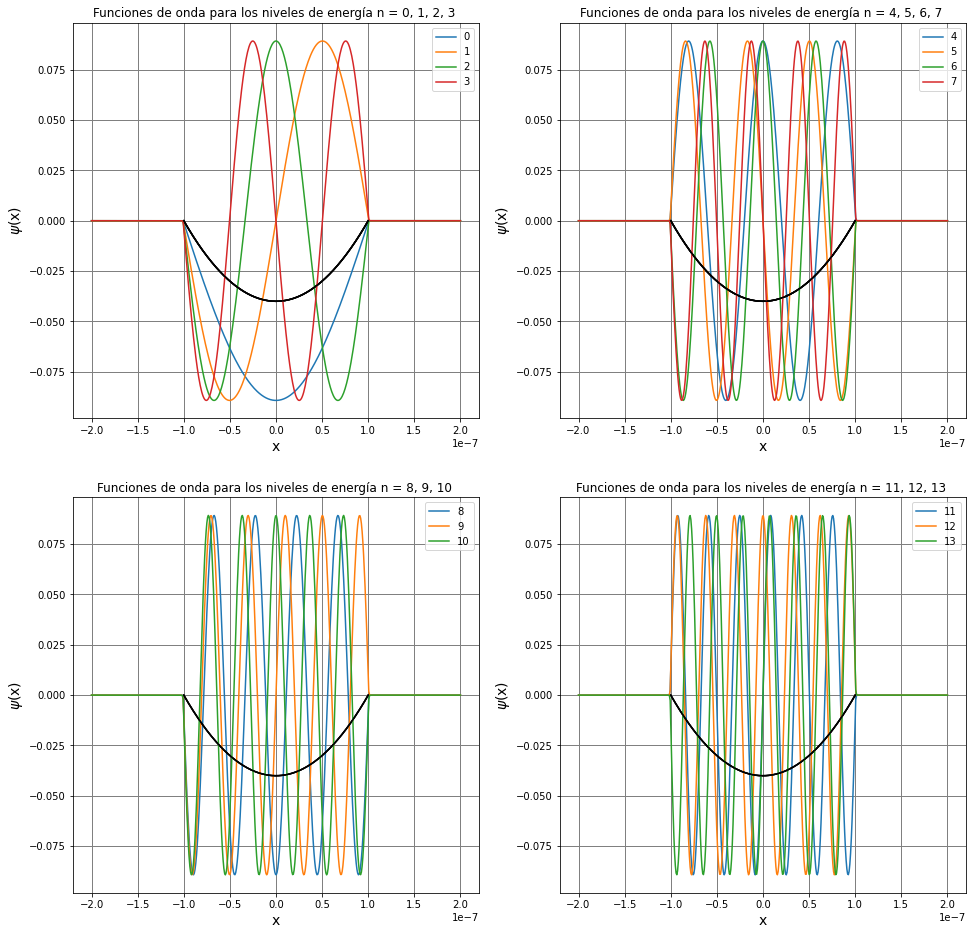

In [ ]:
plt.figure(figsize=(16, 16))
for i in range(len(z)):
    y = []
    y = np.append(y, vec[:, z[i]])
    y = np.append(y, 0)
    y = np.insert(y, 0, 0)
    if i < 4:
        plt.subplot(221)
        plt.plot(x, y, label = '{}'.format(i))
        
        plt.title('Funciones de onda para los niveles de energía n = 0, 1, 2, 3 ')
        plt.grid(color='gray', linestyle='-', linewidth=1)
    if i >= 4 and i < 8: 
        plt.subplot(222)
        plt.plot(x, y, label = '{}'.format(i))
        plt.title('Funciones de onda para los niveles de energía n = 4, 5, 6, 7 ')
        plt.grid(color='gray', linestyle='-', linewidth=1)
    if i >= 8 and i < 11: 
        plt.subplot(223)
        plt.plot(x, y, label = '{}'.format(i))
        plt.title('Funciones de onda para los niveles de energía n = 8, 9, 10 ')
        plt.grid(color='gray', linestyle='-', linewidth=1)
    if i >= 11 and i <= 14: 
        plt.subplot(224)
        plt.plot(x, y, label = '{}'.format(i))
        plt.title('Funciones de onda para los niveles de energía n = 11, 12, 13 ')
        plt.grid(color='gray', linestyle='-', linewidth=1)
    
    plt.xlabel('x', size  = 14)
    plt.ylabel('$\psi$(x)', size = 14)
    plt.plot(u, f, 'k')
    plt.legend()
    
#plt.plot(p, f, 'k')
print(energies)

Los valores de energía se grafican dentro del pozo. Se crea una lista E con los valores de las energías, y f será la ecuación del pozo, esta función está normalizada debido a que las energías se normalizaron con respecto al último valor obtenido. Luego se graficaron los datos de la lista E.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in power
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in power
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in power
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in power
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in power
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in power
  # Remove the CWD from sys.

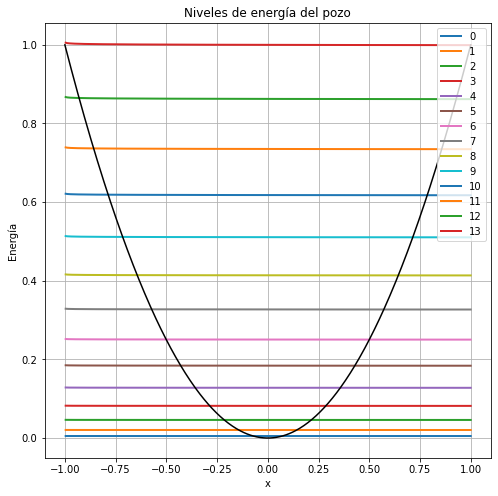

In [ ]:
t = np.linspace(-1, 1, 500)
h = (1-(1*(1**2 - (t)**2))/1**2)

E = [0.00511498, 0.02045911, 0.04603001, 0.0818237,  0.12783459, 0.18405552,
    0.25047772, 0.32709086, 0.413883,   0.51084061, 0.6179486,  0.73519026,
    0.86254734, 1]
fig = plt.figure(figsize =(8,8))
for i in range(0, 14):
  
  yy = E[i]*((t+1)**-0.001)
  plt.plot(t, yy, lw = 2, label = '{}'.format(i) )
  plt.legend(loc='upper right')
  plt.title('Niveles de energía del pozo')

plt.plot(t, h, 'k')
plt.ylabel('Energía')
plt.xlabel('x')
plt.grid()



